This script will extract the terrain parameters (Zmin, Slope, Zmed, Zmax, Area, and Aspect)

In [1]:
# Install necessary packages
!pip install geedim rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 57.9 MB/s eta 0:00:00


In [2]:
# Import packages
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ee
#import geedim as gd
import os
import glob
import json
import math
from tqdm.auto import tqdm
import datetime
#import rioxarray as rxr
import xarray as xr
import shapefile

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive

In [ ]:
os.listdir('/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application')

['.ipynb_checkpoints',
 'study-sites',
 'select_study_sites.ipynb',
 'snow-cover-mapping-application',
 'add_folders.ipynb',
 'figures',
 'snow-cover-mapping',
 '.idea',
 'sync_folders.py',
 'select_study_sites.qgz',
 'Manual Delineations',
 'Completed Sites.gsheet',
 'terrain-parameters',
 'GIS_data',
 'snow_cover_mapping_application.gsheet']

In [4]:
# Alexandra's path to snow-cover-mapping-application/
base_path = '/content/drive/My Drive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping-application/'
# Alexandra's path to study-sites/
study_sites_path = ('/content/drive/My Drive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/')

# define output settings for training data CSV
out_path = os.path.join(study_sites_path, '..', 'snow-cover-mapping-application', 'inputs-outputs')
out_fn = 'Extract_terrain_parameters.csv'


/content/drive/My Drive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/RGI60-02.12483/AOIs/


Text(0.5, 1.0, 'RGI60-02.12483')

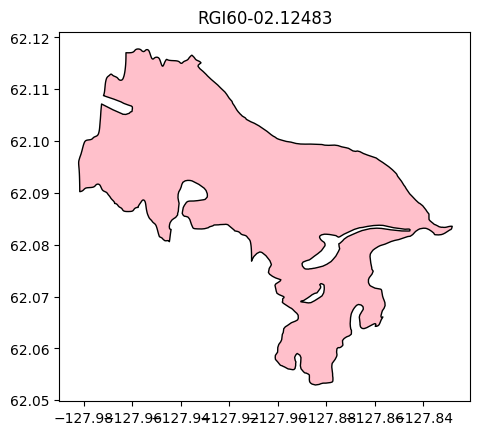

In [5]:
site_name = 'RGI60-02.12483'
title = site_name

# Shapefile path: (Glacier name in file path, modify here)
shapefile_path = f'/content/drive/My Drive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/{site_name}/AOIs/'

shp_file_path = os.path.join(shapefile_path)
print(shp_file_path)

gdf = gpd.read_file(shp_file_path)
gdf.plot(color = 'pink', edgecolor = 'black')
plt.show
plt.title(title)


In [6]:
gdf

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-02.12483,G232090E62090N,19859999,-9999999,-127.91,62.0896,2,1,22.025,1481,...,74,9021,0,0,0,0,9,9,None,"POLYGON ((-127.95579 62.11737, -127.95559 62.1..."


0it [00:00, ?it/s]

/content/drive/My Drive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/RGI60-01.20303/AOIs/
